In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap.umap_ as UMAP

import plotly.express as px

### Generate synthetic data with four clusters in a 3D space

In [16]:
centers = [[ 2, -6, -6],
           [-1,  9,  4],
           [-8,  7,  2],
           [ 4,  7,  9] ]

cluster_std = [1, 1, 2, 3.5]

X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

In [17]:
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

fig =px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str), opacity=0.5, color_discrete_sequence=px.colors.qualitative.G10, title='3-D Scatter Plot of Four Blobs')

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)
fig.show()

- The blobs have varying densities.
- One blob is distinct from the others.
- The two largest blobs are distinct from each other, but both have a bit of overlap with the other blob between them.

In [18]:
s_sc = StandardScaler()
X_scaled = s_sc.fit_transform(X)

### Apply t-SNE to reduce the dimensionality to 2D

In [19]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

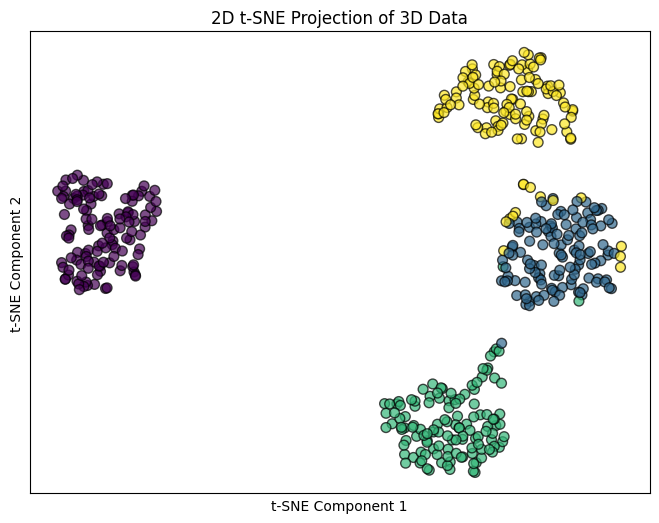

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, ec='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Compare UMAP and PCA dimensionality reduction to 2-D

In [21]:
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1, n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

c:\Users\omama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



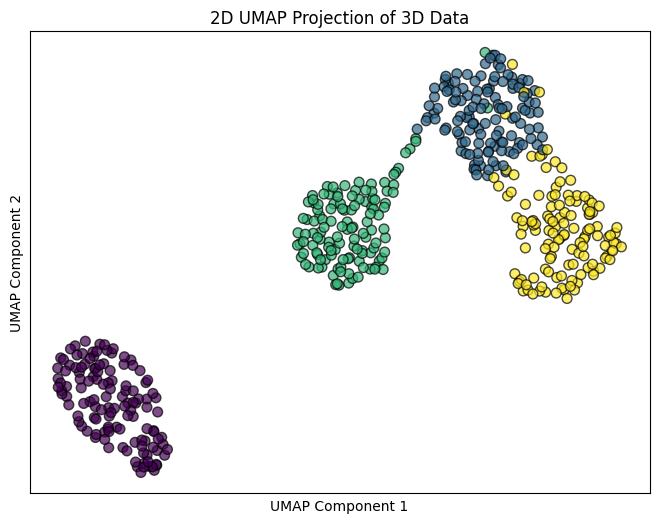

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, ec='k')
ax.set_title('2D UMAP Projection of 3D Data')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

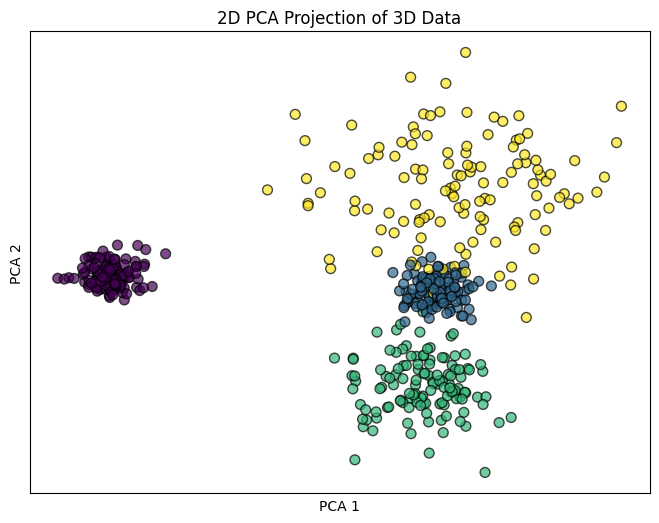

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(111)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, ec='k')
ax1.set_title('2D PCA Projection of 3D Data')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()